# http://tau-data.id/umi/

In [ ]:
# Installing Modules for Google Colab
!wget https://raw.githubusercontent.com/taufikedys/UMI/master/taudata.py
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/Tweets.json
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/dataTweet.txt
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/slang.dic
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/all_indo_man_tag_corpus_model.crf.tagger
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/kata_dasar.txt
!pip install unidecode
!pip install pyLDAvis
!pip install textblob
!pip install sastrawi
!pip install twython
!pip install tweepy
!pip install spacy
!pip install python-crfsuite
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm
import nltk
nltk.download('popular')

In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import taudata as tau, itertools, re, pickle, pyLDAvis, pyLDAvis.sklearn, spacy, nltk, urllib.request
import time, numpy as np, matplotlib.pyplot as plt, networkx as nx, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from tqdm import tqdm_notebook as tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tag import CRFTagger
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from gensim.models import Word2Vec, FastText

pyLDAvis.enable_notebook()
sns.set(style="ticks", color_codes=True)
random_state = 170

c:\winpython_368\python-3.6.8.amd64\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


<center><img alt="" src="images/0_Cover.jpg"/></center> 

## <center><font color="blue">Modul 09: Pendahuluan Social media Analytics</font></center>
<b><center>(C) Taufik Sutanto - 2019</center>
<center>tau-data Indonesia ~ https://tau-data.id ~ taufik@tau-data.id</center>

## <center><font color="blue">Pendahuluan Social Media Analysis</font></center>
<img alt="" src="images/PDS_logo.jpg" />

# <font color="blue">Workshop Schedule</font>

**Social Media & network Analysis**
* 09:00 – 11:00 	Topic Modelling
* 11:00 – 12:00	Latihan Topic Modelling
* 13:00 – 14:00	Pendahuluan Social Network Analytics
* 14:00 – 15.00	Centrality Analysis dan Community Detection
* 15:00 – 16.00	Latihan Centrality Analysis dan Community Detection 

Studi Kasus: **Sentiment Analysis dan Topic Modelling Kasus Banjir**


## <font color="blue">Outline Topic Modelling :</font>
* Pendahuluan Topic Modelling
* Soft Clustering (Topic Modelling): LDA dan NMF
* Visualisasi dan Interpretasi

<h3>Ketika mengolah dokumen (file dalam bentuk teks), harapan kita seperti ini:</h3>

<img alt="" src="images/4_harapan_LSA.png" style="height:99px; width:198px" />


<h3>Namun kita sudah bahas kemarin kenyataannya seperti ini:</h3>

<p><img alt="" src="images/4_kenyataan_LSA.png" style="height:183px; width:182px" /></p>

<h2 id="Topic-Modelling-1-:-Latent-Dirichlet-Allocation">Topic Modelling 1 : Latent Dirichlet Allocation</h2>

<p><img alt="" src="images/4_Document_to_Topics.png" style="height: 300px ; width: 582px" /></p>

<p><strong><big>Tapi bukan seperti klasifikasi dan bukan berarti kata-kata Sport, Technology, dan Entertainment dominan di kategori-kategori tersebut. Topic modelling lebih ke soft-clustering, dimana suatu dokumen dimasukkan ke dalam beberapa cluster (topic) sekaligus. Adapun nama &quot;topic/cluster&quot;-nya di interpretasi dari kata-kata yang ada didalamnya.</big></strong></p>


<p><img alt="" src="images/4_LDA vs LDA.JPG" style="height:400px; width:606px" /></p>
[<a href="http://chdoig.github.io/pytexas2015-topic-modeling/" target="_blank">Sumber gambar ini dan beberapa gambar selanjutnya</a>]</p>

<p><img alt="" src="images/4_definisi topic model.JPG" style="height:350px; width:809px" />


<p><img alt="" src="images/4_inti_LDA.JPG" style="height:500px; width:785px" /></p>
Penjelasan intuitif yang baik: https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d 

<h3>Evaluasi LDA?</h3>

<p><img alt="" src="images/4_Evaluasi_LDA.jpg" style="height:400px; width:888px" /></p>
[Cara lain: http://mimno.infosci.cornell.edu/slides/details.pdf]

<p><img alt="" src="images/4_LDA Pipeline.JPG" style="height:300px; width:663px" /></p>
* Modifikasi dapat dilakukan dengan "pos tags"

In [2]:
# stopId, lemmaId = tau.LoadStopWords(lang='id') 
print('Loading Data  ... ')
T2 = tau.loadTweets(file='data/Tweets.json')
D = [t['full_text'] for t in T2] # Tweet hasil crawling

Loading Data  ... 


In [3]:
print('Loading Slang, stopwords, dan fungsi lemma ... ')

slangFixId = tau.loadCorpus(file = 'data/slang.dic', sep=':')
stopId, lemmaId = tau.LoadStopWords(lang='id') # kita akan menggunakan stopwords dan Lemma

Loading Slang, stopwords, dan fungsi lemma ... 


In [4]:
print('Cleaning Data ... ')
data = []
for i, d in tqdm(enumerate(D)):
    doc = tau.cleanText(d, fix=slangFixId, lemma=lemmaId, stops = set(stopId))
    data.append(doc)
print(data[:3])

Cleaning Data ... 



['reishaac makassar bias ku orang percaya tukang promosi disaat member pakai masker alasan dunia lihat ketampanan member tertua grup ku suka jatuh cinta lihat', 'amaoell ayobantu retweet coba tokotamz pinbb jual sepatu baju aksesoris cewek makassar', 'hai ayobantu retweet coba tokotamz pinbb jual sepatu baju aksesoris cewek makassar']


In [5]:
# Kita mulai dengan membuat VSM-nya
# kita gunakan perintah yang ada di Segmen sebelumnya 
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()

tf = tf_vectorizer.fit_transform(data)
tf_terms = tf_vectorizer.get_feature_names()
# Mengapa tf bukan tfidf?
# Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.
# Bisa di tamahkan dengan Frequency filtering "Max_df" dan "Min_df"

tf.shape

(10000, 10561)

In [6]:
# Dilanjutkan dengan membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 3
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [8]:
# Melihat Topik-topiknya
vsm_topics = lda.transform(tf)
print(vsm_topics.shape)
vsm_topics
# Ukuran kolom = #Topics ==> Dimension Reduction

(10000, 3)


array([[0.01347607, 0.97093821, 0.01558571],
       [0.94823848, 0.02584276, 0.02591876],
       [0.94826935, 0.02582597, 0.02590468],
       ...,
       [0.95194209, 0.02399802, 0.0240599 ],
       [0.94820362, 0.02586172, 0.02593466],
       [0.9551766 , 0.02238512, 0.02243829]])

In [9]:
# Seandainya diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
doc_topic[:10]

[2, 1, 1, 1, 1, 1, 3, 3, 2, 2]

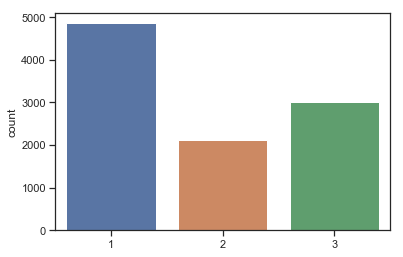

In [10]:
# mari kita plot
plot = sns.countplot(doc_topic)

In [11]:
# Mari kita coba maknai masing-masing topic ini
Top_Words = 15
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
tau.print_Topics(lda, tf_terms, n_topics, Top_Words)

Printing top 3 Topics, with top 15 Words:
Topic #1:
makassar jual coba baju retweet cewek tokotamz sepatu pinbb ayobantu aksesoris hai tsu iya vv
Topic #2:
makassar rt psm indostransfer klok persija marc resmi belanda gelandang anthony official memboyong kah bali
Topic #3:
makassar rt psm lalenok united adem iya bugis bahasa belajar mari afc poppelangi jalan anies


In [12]:
# %matplotlib inline
# Mari kita Plot, supaya lebih jelas
# Catatan, bergantung dari laptop yang digunakan, image terkadang cukup lama untuk muncul.
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.344862  0.003469       1        1  51.266938
2     -0.167194 -0.173078       2        1  26.880258
1     -0.177668  0.169609       3        1  21.852804, topic_info=      Category         Freq      Term        Total  loglift  logprob
4401   Default  4221.000000      jual  4221.000000  30.0000  30.0000
1909   Default  4220.000000      coba  4220.000000  29.0000  29.0000
958    Default  4213.000000      baju  4213.000000  28.0000  28.0000
8210   Default  4204.000000   retweet  4204.000000  27.0000  27.0000
1798   Default  4204.000000     cewek  4204.000000  26.0000  26.0000
...        ...          ...       ...          ...      ...      ...
5560    Topic3  1220.093228  makassar  7810.957412  -0.3358  -3.0030
3475    Topic3   111.180117      grup   179.865761   1.0398  -5.3985
10040   Topic3   122.240442    united   414.244863   0.3004  -5.3037
5076    Topic3    92.856648      kota   189.529621   0.8074  -5.5786
6964    Topic3    95.716992     orang   261.916117   0.5142  -5.5483

[153 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
88         2  0.997757        adem
154        2  0.996262         afc
273        1  0.999823   aksesoris
457        2  0.996428  anaklolina
561        2  0.994629      angkat
...      ...       ...         ...
10040      3  0.294512      united
10191      2  0.140151          vs
10191      3  0.850918          vs
10194      1  0.998154          vv
10540      3  0.997134        zone

[151 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

# Bagaimana jika kita ingin menggunakan semi-supervised (guided) LDA?
https://medium.freecodecamp.org/how-we-changed-unsupervised-lda-to-semi-supervised-guidedlda-e36a95f3a164 

# Bagaimana melakukan Post-Tag sebelum Topic Modelling?

In [17]:
from spacy.lang.id import Indonesian
from nltk.tag import CRFTagger
nlp_id = Indonesian()  # Language Model
ct = CRFTagger()
ct.set_model_file('data/all_indo_man_tag_corpus_model.crf.tagger')

def NLPfilter(t, filters):
    tokens = nlp_id(t)
    tokens = [str(k) for k in tokens if len(k)>2]
    hasil = ct.tag_sents([tokens])
    return [k[0] for k in hasil[0] if k[1] in filters]

In [18]:
filters = set(['NN', 'NNP', 'NNS', 'NNPS', 'JJ'])

for i, d in tqdm(enumerate(data)):
    data[i] = NLPfilter(d,filters)

' '.join(data[1])

'baju aksesoris cewek makassar'

In [20]:
print(data[:3])

[['reishaac', 'makassar', 'bias', 'orang', 'tukang', 'promosi', 'disaat', 'member', 'masker', 'alasan', 'dunia', 'ketampanan', 'member', 'tertua', 'grup'], ['baju', 'aksesoris', 'cewek', 'makassar'], ['ayobantu', 'retweet', 'tokotamz', 'pinbb', 'baju', 'aksesoris', 'cewek', 'makassar']]


# Evaluasi: Bagaimana mendapatkan parameter Optimal Topic Modelling?

**Beberapa catatan penting**:
1. Hati-hati Struktur Data, untuk melakukan evaluasi Topic Modelling struktur data yang digunakan mirip dengan Word Embedding.
2. Kita akan melakukan cross-validasi dan N-Gram
3. Ada berbagai metric evaluasi https://radimrehurek.com/gensim/models/coherencemodel.html
4. Referensi paper: http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf

In [21]:
bigram_t = Phrases(data, min_count=10)
trigram_t = Phrases(bigram_t[data])
for idx, d in enumerate(data):
    for token in bigram_t[d]:
        if '_' in token:# Token is a bigram, add to document.
            data[idx].append(token)
    for token in trigram_t[d]:
        if '_' in token:# Token is a bigram, add to document.
            data[idx].append(token)

# Create a dictionary representation of the documents.
# Remove rare & common tokens
dictionary_t = Dictionary(data)
dictionary_t.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus_t = [dictionary_t.doc2bow(doc) for doc in data]
print('Number of unique tokens: %d' % len(dictionary_t))
print('Number of documents: %d' % len(corpus_t))
print(corpus_t[:1])


Number of unique tokens: 578
Number of documents: 10000
[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [22]:
def compute_coherence_values(dictionary, corpus, texts, limit, coherence='c_v', start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Caution cell berikut ini membutuhkan waktu yang cukup signifikan untuk selesai, karena selain LDA *computationally expensive* loopingnya juga melakukan Cross-validasi di setiap jumlah topik *k*

In [23]:
start, step, limit = 2, 1, 10 # Ganti dengan berapa banyak Topic yang ingin di hitung/explore
coh_t, kCV = [], 3 # hati-hati sangat lambat karena cross validation pada metode yang memang tidak efisien (LDA)

for i in tqdm(range(kCV)):
    model_list, c = compute_coherence_values(dictionary=dictionary_t, corpus=corpus_t, texts=data, start=start, limit=limit, step=step)
    coh_t.append(c)
    
coherence_t = np.mean(np.array(coh_t), axis=0)
'Done'

'Done'

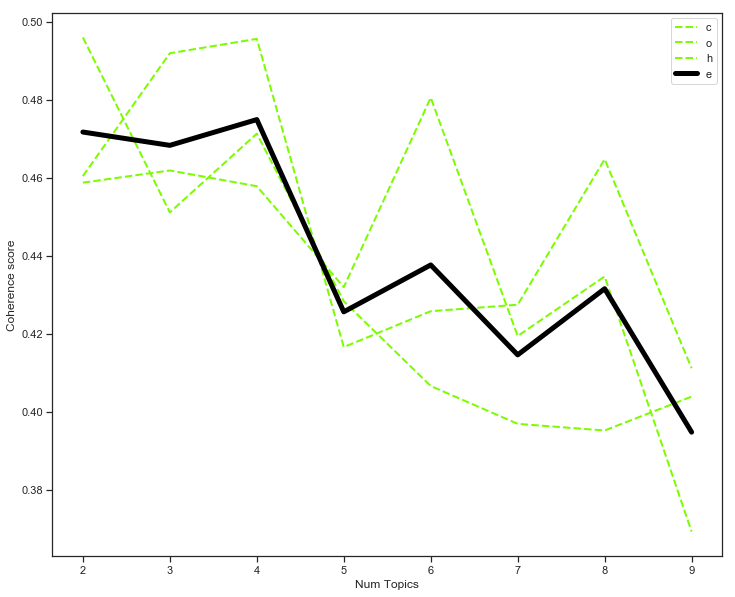

In [24]:
# Show graph
x = range(start, limit, step)
plt.figure(figsize=(12,10))
for c in coh_t:
    plt.plot(x, c, '--', color = 'lawngreen', linewidth = 2)
plt.plot(x, coherence_t, '-', color = 'black', linewidth = 5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Referensi Pilihan:

* perhitungan Manual Topic Modelling LDA: http://brooksandrew.github.io/simpleblog/articles/latent-dirichlet-allocation-under-the-hood/
* http://mimno.infosci.cornell.edu/slides/details.pdf
* https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
* http://www.umiacs.umd.edu/~jbg/docs/nips2009-rtl.pdf
* http://radimrehurek.com/topic_modeling_tutorial/2%20-%20Topic%20Modeling.html
* Penjelasan intuitif yang baik: https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d 
* inconjunction dengan interactive program berikut: https://lettier.com/projects/lda-topic-modeling/ 

<p>&nbsp;</p>

<h3 id="Non-Negative-Matrix-Decomposition-(NMF)">Non-Negative Matrix Decomposition (NMF)</h3>

<p><img alt="" src="images/4_NMF.jpg" style="height: 349px; width: 600px;" /> [image source: <a href="https://www.slideshare.net/SebastianRuder/dynamic-topic-modeling-via-nonnegative-matrix-factorization-dr-derek-greene]">https://www.slideshare.net/SebastianRuder/dynamic-topic-modeling-via-nonnegative-matrix-factorization-dr-derek-greene]</a></p>

<p>&nbsp;</p>


<h3 id="Tujuan-NMF:">Tujuan NMF:</h3>

<p><img alt="" src="images/4_NMF_Goal.JPG" style="height: 363px; width: 600px;" /></p>


In [26]:
# Langsung Aplikasi-nya
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

data = []
for i, d in tqdm(enumerate(D)):
    doc = tau.cleanText(d, fix=slangFixId, lemma=lemmaId, stops = set(stopId))
    data.append(doc)


tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(data)
nmf_model = NMF(n_components = 3, random_state=0)
nmf = nmf_model.fit(tfidf)

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tau.print_Topics(nmf, tfidf_feature_names, n_topics, Top_Words)



Topics in NMF model:
Topic #1:
ayobantu aksesoris tokotamz pinbb sepatu retweet cewek baju jual coba makassar hai tsu iya vv
Topic #2:
persija marc klok resmi memboyong anthony official gelandang belanda indostransfer psm rt makassar ceo munafri
Topic #3:
poppelangi mari belajar bugis bahasa rt makassar anaklolina kad pembicaraan bungkam karniilyas anies baswedan angkat


In [27]:
# Sama seperti LDA kita bisa melihat distribusi topic setiap dokumen
vsm_topics = nmf.transform(tfidf)
vsm_topics[:10]

array([[7.84006501e-04, 1.08362026e-03, 1.69524500e-03],
       [7.41342796e-02, 7.39749370e-05, 0.00000000e+00],
       [1.38077213e-01, 0.00000000e+00, 0.00000000e+00],
       [1.38835876e-01, 1.41600013e-04, 0.00000000e+00],
       [1.25111554e-01, 0.00000000e+00, 3.04238706e-03],
       [1.66746235e-03, 1.32170851e-03, 2.10846795e-03],
       [9.23429664e-04, 4.99684080e-03, 8.05778982e-03],
       [0.00000000e+00, 4.97002962e-03, 8.96835370e-03],
       [0.00000000e+00, 2.24395478e-01, 0.00000000e+00],
       [1.25924804e-03, 6.91111243e-02, 0.00000000e+00]])


In total there are 3 major topics, distributed as follows


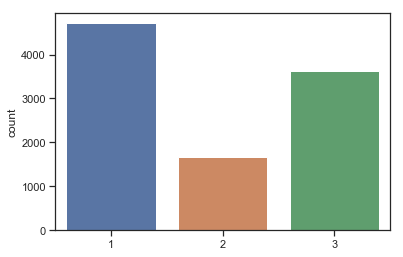

In [28]:
# Seandainya diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
sns.countplot(doc_topic)
plt.show()

In [29]:
# Perkalian Matrix-nya (Aljabar Linear)
W = nmf_model.fit_transform(tfidf)
H = nmf_model.components_
terms = tfidf_vectorizer.get_feature_names()
print(W.shape, H.shape, len(terms))
#print(terms[:5])

(10000, 3) (3, 10561) 10561


# Latihan :

* Load data data tweet dengan isu berbeda, "misal" **revitalisasi monas, banjir, atau isu terkini lainnya**
* Lakukan preprocessing (termasuk lemma) dan pos tag (ambil hanya noun saja)
* Bandingkan hasil topic dari LDA, dan NMF dari data tersebut.
* Apakah hasilnya sudah baik?
* Buat visualisasi pyLDAvis-nya dan analisa lebih lanjut.


# <center><font color="blue"> End of Module 09

<hr />
<p><img alt="" src="images/1_meme.jpg" /></p>